# Prepare dataset
1. fill all the missing values in column ``Sex`` with ``'a'``. 
2. fill all the missing values in column ``Married`` with ``'u'``. 
3. fill all the missing values in column ``Bank Costumer`` with ``'g'``. 
4. Impute missing values in column ``Age`` using a linear regression on columns ``Years employed`` and ``Age``. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('credit_approval.csv')
data.head()

,Sex,Age,Debt,Married,Bank Costumer,Educational Level,Ethnicity,Years employed,Prior default,Employed,Credit score,Drivers Licence,Citizen,Zip code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120,0.0,+


In [3]:
data['Approved'].unique()

array(['+', '-', nan], dtype=object)

In [4]:
# There are two rows that all the cells are empty. First we need to drop those rows
data.dropna(thresh=1, inplace = True, axis = 0)

In [5]:
data.replace('?', np.nan, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 691
Data columns (total 16 columns):
Sex                  678 non-null object
Age                  678 non-null object
Debt                 690 non-null float64
Married              684 non-null object
Bank Costumer        684 non-null object
Educational Level    681 non-null object
Ethnicity            681 non-null object
Years employed       690 non-null float64
Prior default        690 non-null object
Employed             690 non-null object
Credit score         690 non-null float64
Drivers Licence      690 non-null object
Citizen              690 non-null object
Zip code             677 non-null object
Income               690 non-null float64
Approved             690 non-null object
dtypes: float64(4), object(12)
memory usage: 91.6+ KB


In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Sex,Age,Debt,Years employed,Prior default,Employed,Credit score,Drivers Licence,Income,Approved,Married__l,Married__u,Married__y,Bank Costumer__g,Bank Costumer__gg,Bank Costumer__p,Citizen__g,Citizen__p,Citizen__s
0,0,1,30.83,0.000,1.25,1,1,1.0,0,0.0,1,0,1,0,1,0,0,1,0,0
1,1,0,58.67,4.460,3.04,1,1,6.0,0,560.0,1,0,1,0,1,0,0,1,0,0
2,2,0,24.50,0.500,1.50,1,0,0.0,0,824.0,1,0,1,0,1,0,0,1,0,0
3,3,1,27.83,1.540,3.75,1,1,5.0,1,3.0,1,0,1,0,1,0,0,1,0,0
4,4,1,20.17,5.625,1.71,1,0,0.0,0,0.0,1,0,1,0,1,0,0,0,0,1


In [2]:
X = data.drop(['Approved','Unnamed: 0'],  axis = 1)
y = data['Approved']

In [3]:
X.head()

,Sex,Age,Debt,Years employed,Prior default,Employed,Credit score,Drivers Licence,Income,Married__l,Married__u,Married__y,Bank Costumer__g,Bank Costumer__gg,Bank Costumer__p,Citizen__g,Citizen__p,Citizen__s
0,1,30.83,0.000,1.25,1,1,1.0,0,0.0,0,1,0,1,0,0,1,0,0
1,0,58.67,4.460,3.04,1,1,6.0,0,560.0,0,1,0,1,0,0,1,0,0
2,0,24.50,0.500,1.50,1,0,0.0,0,824.0,0,1,0,1,0,0,1,0,0
3,1,27.83,1.540,3.75,1,1,5.0,1,3.0,0,1,0,1,0,0,1,0,0
4,1,20.17,5.625,1.71,1,0,0.0,0,0.0,0,1,0,1,0,0,0,0,1


In [4]:
X.shape

(690, 18)

In [5]:
y.sum()/y.count()

0.4449275362318841

In [6]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Classification
1. KNN - best params
2. Logistic regreassion
3. LinearSVC
4. SVC - kernels
5. Decision tree classifier

In [10]:
f = open('Credit_approval_BUAN002.csv', 'w')
line = 'Model ,Best Params, Train score, Test score\n'
f.write(line)
f.close()

## ``SVC(kernel = 'rbf')``

- `` C in [0.001, 0.01, 0.1, 1, 10, 100]``
- `` gamma in [0.001, 0.01, 0.1, 1, 10, 100]``

In [11]:
from sklearn.svm import SVC

index = []
train = []
test = []

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
        index.append((C, gamma))
        
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))

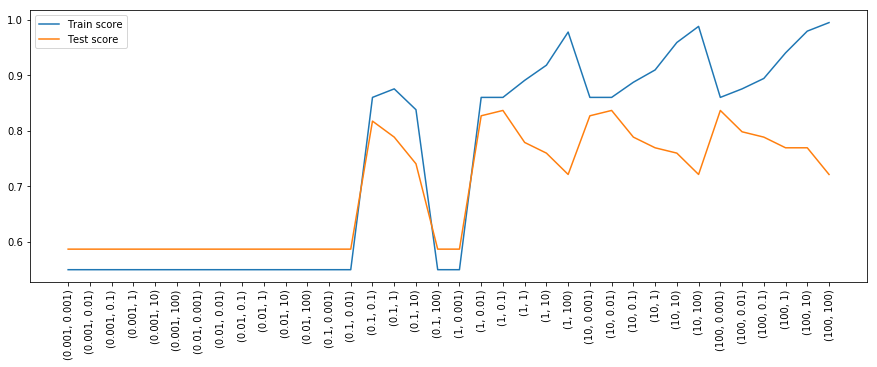

In [13]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 5))

plt.plot(np.arange(len(index)), train, label = 'Train score')
plt.plot(np.arange(len(index)), test, label = 'Test score')

plt.xticks(np.arange(len(index)), index, rotation = 90)

plt.legend()

In [25]:
from sklearn.model_selection import GridSearchCV

#base model
svc = SVC(kernel = 'rbf')

#model param
grid_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#build grid search model
svc_grid = GridSearchCV(svc, grid_param, cv = 5, scoring='precision', n_jobs = -1)

#train the model
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [26]:
print('Best params:', svc_grid.best_params_)
print('Best cross validation score:', svc_grid.best_score_)

Best params: {'C': 0.1, 'gamma': 10}
Best cross validation score: 0.8999112437930231


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve

y_pred = svc_grid.predict(X_train)
print('Accuracy score: ', accuracy_score(y_train, y_pred))
print('Precision score: ', precision_score(y_train, y_pred))
print('Recall score: ', recall_score(y_train, y_pred))

Accuracy score:  0.8378839590443686
Precision score:  0.9082125603864735
Recall score:  0.7121212121212122


In [29]:
y_pred = svc_grid.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

Accuracy score:  0.7403846153846154
Precision score:  0.75
Recall score:  0.5581395348837209


In [31]:
precision, recall, threshold = precision_recall_curve(y_train, svc_grid.decision_function(X_train))

Text(0, 0.5, 'Recall')

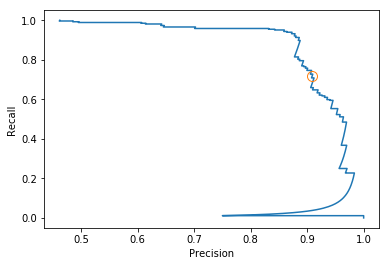

In [36]:
%matplotlib inline

plt.plot(precision, recall)
close_zero = np.argmin(np.abs(threshold))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, fillstyle = 'none')
plt.xlabel('Precision')
plt.ylabel('Recall')

In [50]:
y_cal = svc_grid.decision_function(X_train)
y_cal = np.where(y_cal < -0.3, 0, 1)

In [51]:
print('Accuracy score: ', accuracy_score(y_train, y_cal))
print('Precision score: ', precision_score(y_train, y_cal))
print('Recall score: ', recall_score(y_train, y_cal))

Accuracy score:  0.909556313993174
Precision score:  0.8781362007168458
Recall score:  0.928030303030303


In [52]:
y_cal_test = svc_grid.decision_function(X_test)
y_cal_test = np.where(y_cal_test < -0.3, 0, 1)

print('Accuracy score: ', accuracy_score(y_test, y_cal_test))
print('Precision score: ', precision_score(y_test, y_cal_test))
print('Recall score: ', recall_score(y_test, y_cal_test))

Accuracy score:  0.7788461538461539
Precision score:  0.7380952380952381
Recall score:  0.7209302325581395


1. try different models with grid search
2. ensemble 